# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Alfan Fauzi
- **Email:** alfanfauzi@student.ub.ac.id
- **ID Dicoding:** MC006D5Y1331

## Menentukan Pertanyaan Bisnis

- Berdasarkan data historis, bagaimana pengaruh musim dan kondisi cuaca terhadap perilaku penyewaan pengguna kasual
- Bagaimana pengaruh penyewaan pengguna kasual pada hari libur dan tidak

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- data diatas adalah data penyewaan sepeda selama 2 tahun yang memiliki 731 data dan 16 kolom

### Assessing Data

In [4]:
# cek type data dan jumlah pada setiap kolom
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
#cek apakah terdapat data yang hilang
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
#cek apakah ada data yang duplikat
day_df.duplicated().sum()

0

In [5]:
#melihat data count,mean,std,min dll pada setiap kolom
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


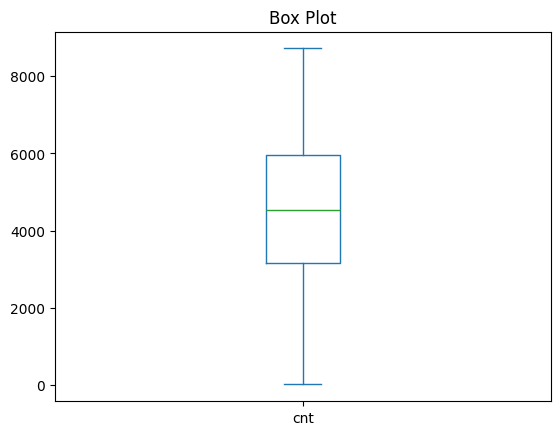

In [9]:
#cek apakah terdapat outlier pada kolom cnt
day_df['cnt'].plot(kind='box')
plt.title('Box Plot')
plt.show()

**Insight:**
- pada data diatas memiliki data yang bersih tidak ada data yang hilang, data yang diplikat, tidak ada outlier pada data. tetapi terdapat keanehan pada type data kolom dydate

### Cleaning Data

In [8]:
# mengubah type data kolom dteday menjadi format tanggal
datetime_column = 'dteday'
day_df[datetime_column] = pd.to_datetime(day_df[datetime_column])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- pada Assessing data terlihat keanehan pada kolom dteday yang memiliki type data object seharusnya pada dteday yang berisikan data tanggal memiliki type data datetime

## Exploratory Data Analysis (EDA)

### Explore ...

In [17]:
#cek jumlah penyewa, maksimal penyewa, minimal penyewa pada kolom casual dan registered setiap weathersit
df_grouped = day_df.groupby(['season','weathersit']).agg({
    'casual': ['sum','max','min']})

# Mengurutkan berdasarkan jumlah total pengguna kasual ('sum') dari tertinggi ke terendah
df_sorted = df_grouped.sort_values(('casual', 'sum'), ascending=False)

print(df_sorted)

                   casual           
                      sum   max  min
season weathersit                   
3      1           167945  3160  562
2      1           146388  3410  222
4      1            90451  3031  143
2      2            56714  2496  166
3      2            56407  3065  226
1      1            41562  1658   15
4      2            37876  2643   87
1      2            18779  3155    9
3      3             1739  1264  118
4      3             1455   315    2
2      3              420   179  120
1      3              281   192    9


In [65]:
#cek jumlah penyewaan sepeda oleh casual berdasarkan workingday
day_df.groupby('workingday').agg({
    'casual': ['sum']
})

,casual
,sum
workingday,
0,316732
1,303285


In [66]:
#cek jumlah penyewaan sepeda oleh casual berdasarkan holiday
day_df.groupby('holiday').agg({
    'casual': ['sum']
})

,casual
,sum
holiday,
0,597658
1,22359


In [71]:
day_df['workingday_label'] = day_df['workingday'].map({1: 'Hari Kerja', 0: 'akhir pekan'})
day_df['holiday_label'] = day_df['holiday'].map({1: 'libur', 0: 'hari biasa'})


day_df.groupby(['holiday_label','workingday_label']).agg({
    'casual': ['sum']
})

casual
                                   sum
holiday_label workingday_label        
hari biasa    Hari Kerja        303285
              akhir pekan       294373
libur         akhir pekan        22359

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berdasarkan data historis, bagaimana pengaruh musim dan kondisi cuaca terhadap perilaku penyewaan pengguna kasual

<ipython-input-29-9d033377151a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


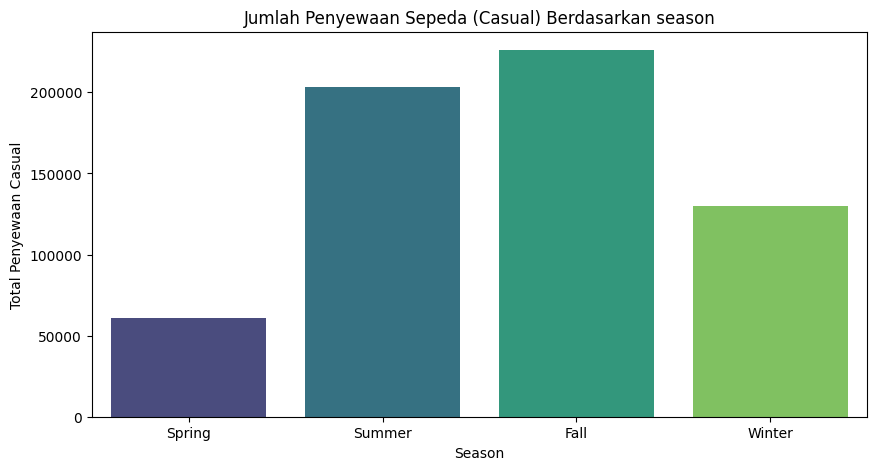

In [29]:
#Membuat diagram penyewa casual pada setiap season

# Grouping berdasarkan season
df_grouped = day_df.groupby(['season']).agg({
    'casual': ['sum']
}).reset_index()

# Ubah nama kolom agar lebih mudah diakses
df_grouped.columns = ['season', 'casual_sum']

# Mapping angka season ke nama musim
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df_grouped['season'] = df_grouped['season'].map(season_mapping)

# Visualisasi jumlah penyewa casual berdasarkan season
plt.figure(figsize=(10, 5))
sns.barplot(
    x='season',
    y='casual_sum',
    data=df_grouped,
    palette='viridis'
)

plt.xlabel("Season")
plt.ylabel("Total Penyewaan Casual")
plt.title("Jumlah Penyewaan Sepeda (Casual) Berdasarkan season")

plt.show()


<ipython-input-31-0e58e883c3ff>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


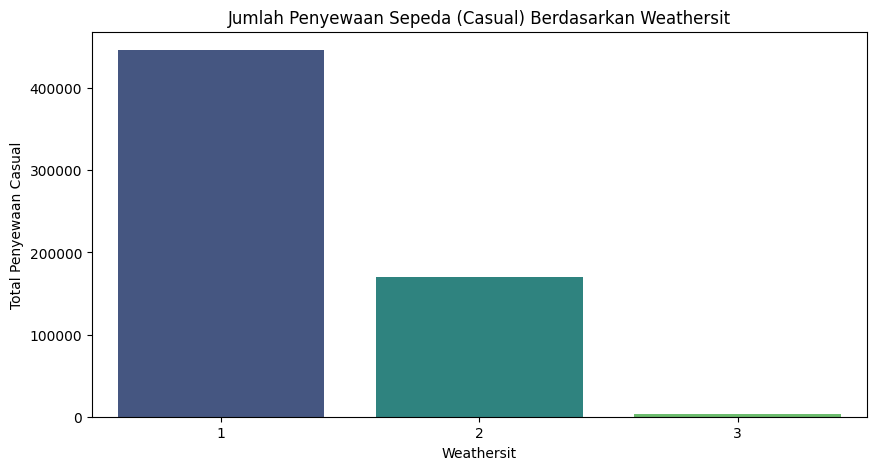

In [31]:
#Membuat diagram penyewaan casual berdasarkan weathersit

# Grouping berdasarkan weathersit
df_grouped = day_df.groupby(['weathersit']).agg({
    'casual': ['sum']
}).reset_index()

# Ubah nama kolom agar lebih mudah diakses
df_grouped.columns = ['weathersit', 'casual_sum']

# Visualisasi jumlah penyewa casual berdasarkan weathersit
plt.figure(figsize=(10, 5))
sns.barplot(
    x='weathersit',
    y='casual_sum',
    data=df_grouped,
    palette='viridis'
)

plt.xlabel("Weathersit")
plt.ylabel("Total Penyewaan Casual")
plt.title("Jumlah Penyewaan Sepeda (Casual) Berdasarkan Weathersit")

plt.show()


<ipython-input-33-e65f363e80d7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


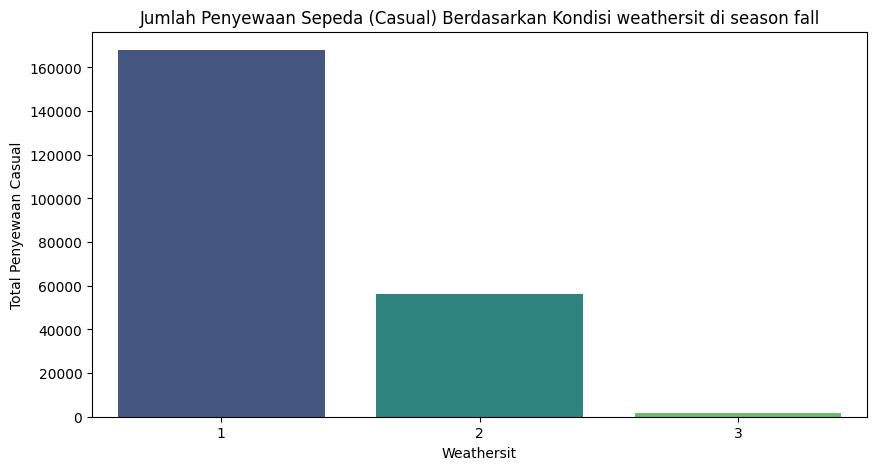

In [33]:
#Membuat diagram penyewaan casual pada season fall berdasarkan weathersit

# Filter data hanya untuk season dengan index 3 (Fall)
df_fall = day_df[day_df['season'] == 3]

# Grouping berdasarkan weathersit untuk musim Fall
df_grouped = df_fall.groupby(['weathersit']).agg({
    'casual': ['sum']
}).reset_index()

# Ubah nama kolom agar lebih mudah diakses
df_grouped.columns = ['weathersit', 'casual_sum']

# Visualisasi jumlah penyewa casual berdasarkan weathersit pada musim Fall
plt.figure(figsize=(10, 5))
sns.barplot(
    x='weathersit',
    y='casual_sum',
    data=df_grouped,
    palette='viridis'
)

plt.xlabel("Weathersit")
plt.ylabel("Total Penyewaan Casual")
plt.title("Jumlah Penyewaan Sepeda (Casual) Berdasarkan Kondisi weathersit di season fall")

plt.show()


Insight:
- Terdapat 3 diagram yang telah dibuat pada diagram pertama menunjukkan penyewaan sepeda casual terbanyak pada season fall, lalu untuk diagram ke dua menampilkan penyewaan sepeda casual berdasarkan weatheresit, dan diagram ke tigaa menampilkan penyewaan sepeda casual weatheresit pada season fall.
- hasil dari ketiga diagram tersebut dapat di liat bahwasanya penyewaan sepeda oleh casual terbanyak pada weatheresit 1 atau (Clear, Few clouds, Partly cloudy, Partly cloudy) dan pada season fall.
- jadi dapaat disimpulkan perilaku penyewaan sepeda sering dilakukan oleh casual pada weatheresit 1  atau (Clear, Few clouds, Partly cloudy, Partly cloudy) dan pada season fall dan dapat lebih mempromosikan penyewaan sepeda pada waktu tersebut untuk menjadikan anggota registered.

### Pertanyaan 2: Bagaimana pengaruh penyewaan pengguna kasual pada hari libur dan tidak

<ipython-input-61-107d1925d760>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


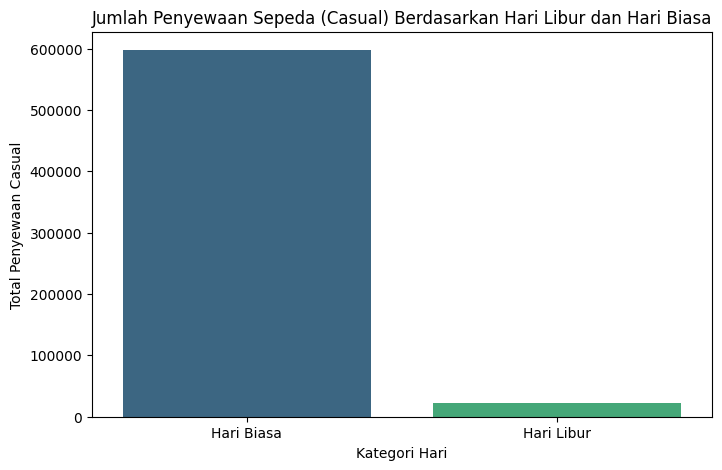

In [61]:
#membuat diagram jumlah penyewaan casual berdasarkan holiday

# Grouping jumlah penyewaan casual berdasarkan holiday
df_grouped = day_df.groupby('holiday').agg({
    'casual': ['sum']
}).reset_index()

# Ubah nama kolom agar lebih mudah diakses
df_grouped.columns = ['holiday', 'casual_sum']

# Mapping angka ke label deskriptif
holiday_mapping = {1: 'Hari Libur', 0: 'Hari Biasa'}
df_grouped['holiday'] = df_grouped['holiday'].map(holiday_mapping)

# Visualisasi menggunakan seaborn
plt.figure(figsize=(8, 5))
sns.barplot(
    x='holiday',
    y='casual_sum',
    data=df_grouped,
    palette='viridis'
)

plt.xlabel("Kategori Hari")
plt.ylabel("Total Penyewaan Casual")
plt.title("Jumlah Penyewaan Sepeda (Casual) Berdasarkan Hari Libur dan Hari Biasa")

plt.show()


<ipython-input-70-88fa6b81110d>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


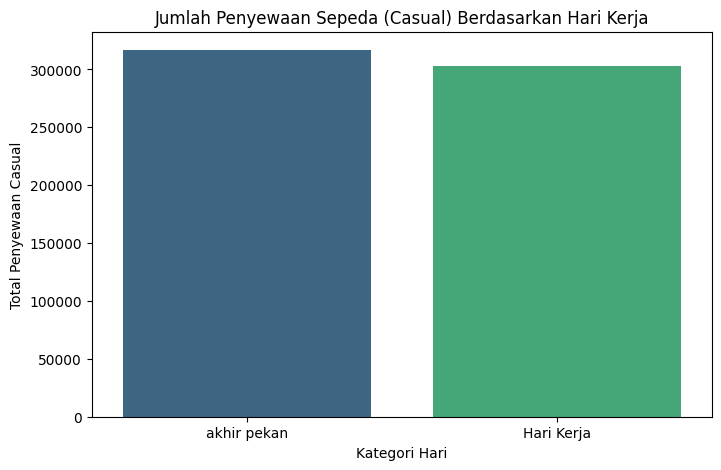

In [70]:
#membuat diagram jumlah penyewaan casual berdasarkan workingday

# Grouping jumlah penyewaan casual berdasarkan workingday
df_grouped = day_df.groupby('workingday').agg({
    'casual': ['sum']
}).reset_index()

# Ubah nama kolom agar lebih mudah diakses
df_grouped.columns = ['workingday', 'casual_sum']

# Mapping angka ke label deskriptif
workingday_mapping = {1: 'Hari Kerja', 0: 'akhir pekan'}
df_grouped['workingday'] = df_grouped['workingday'].map(workingday_mapping)

# Visualisasi menggunakan seaborn
plt.figure(figsize=(8, 5))
sns.barplot(
    x='workingday',
    y='casual_sum',
    data=df_grouped,
    palette='viridis'
)

plt.xlabel("Kategori Hari")
plt.ylabel("Total Penyewaan Casual")
plt.title("Jumlah Penyewaan Sepeda (Casual) Berdasarkan Hari Kerja")

plt.show()


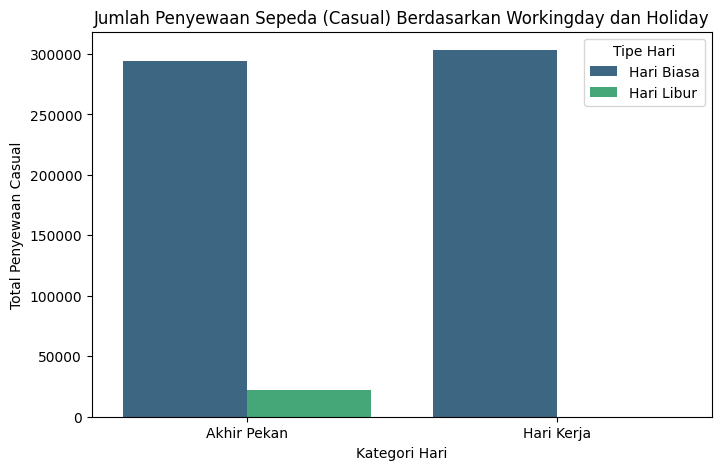

In [79]:
#cek jumlah penyewaan casual berdasarkan workingday dan holiday

# Grouping jumlah penyewaan casual berdasarkan workingday dan holiday
df_grouped = day_df.groupby(['holiday', 'workingday']).agg({
    'casual': ['sum']
}).reset_index()

# Ubah nama kolom agar lebih mudah diakses
df_grouped.columns = ['holiday', 'workingday', 'casual_sum']

# Mapping angka ke label deskriptif
holiday_mapping = {1: 'Hari Libur', 0: 'Hari Biasa'}
workingday_mapping = {1: 'Hari Kerja', 0: 'Akhir Pekan'}

df_grouped['holiday'] = df_grouped['holiday'].map(holiday_mapping)
df_grouped['workingday'] = df_grouped['workingday'].map(workingday_mapping)

# Visualisasi menggunakan seaborn
plt.figure(figsize=(8, 5))
sns.barplot(
    x='workingday',
    y='casual_sum',
    hue='holiday',  # Warna berbeda untuk holiday
    data=df_grouped,
    palette='viridis'
)

plt.xlabel("Kategori Hari")
plt.ylabel("Total Penyewaan Casual")
plt.title("Jumlah Penyewaan Sepeda (Casual) Berdasarkan Workingday dan Holiday")
plt.legend(title="Tipe Hari")  # Tambahkan legenda untuk membedakan holiday

plt.show()


**Insight:**
- terdapat 3 diagram diatas yang pertama diagram jumlah penyewaan sepeda oleh casual berdasarkan holiday. yang kedua diagram menampilkan jumlah penyewaan sepeda oleh casual berdasarkan working day. dan yang terakhir diagram menampilkan jumlah penyewaan sepeda pada workingday dan holiday
- hasil dari ketiga diagram tersebut dapat di liat bahwasanya penyewaan sepeda oleh casual terbanyak berdasarkan hari biasa pada hari kerja.
- jadi dapat disimpulkan perilaku penyewaan sepeda sering dilakukan oleh casual pada hari biasa pada hari kerja dan dapat lebih mempromosikan penyewaan sepeda pada waktu tersebut untuk menjadikan anggota registered.

## Analisis Lanjutan (Opsional)

<ipython-input-83-9ca5140cb396>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


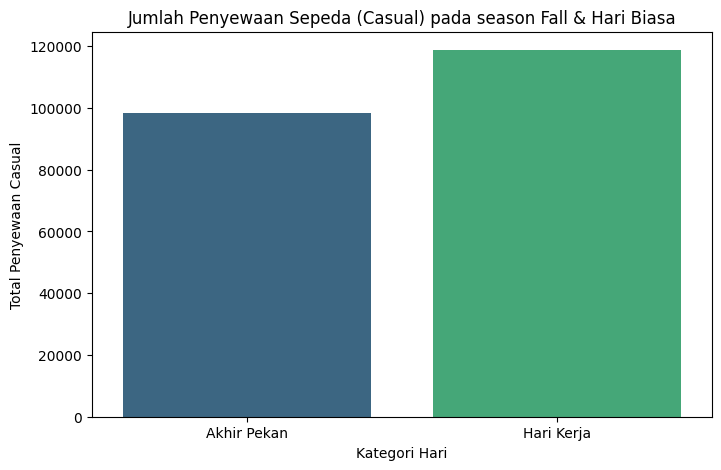

In [83]:
#menggabungkan jumalah penyewaan sepeda berdasarkan workingday pada season fall

# Filter data hanya untuk musim Fall (season = 3)
df_fall = day_df[day_df['season'] == 3]

# Filter hanya untuk hari biasa (holiday = 0)
df_holiday = df_fall[df_fall['holiday'] == 0]

# Grouping jumlah penyewaan casual berdasarkan workingday
df_grouped = df_holiday.groupby('workingday').agg({
    'casual': ['sum']
}).reset_index()

# Ubah nama kolom agar lebih mudah diakses
df_grouped.columns = ['workingday', 'casual_sum']

# Mapping angka ke label deskriptif
workingday_mapping = {1: 'Hari Kerja', 0: 'Akhir Pekan'}
df_grouped['workingday'] = df_grouped['workingday'].map(workingday_mapping)

# Visualisasi menggunakan seaborn
plt.figure(figsize=(8, 5))
sns.barplot(
    x='workingday',
    y='casual_sum',
    data=df_grouped,
    palette='viridis'
)

plt.xlabel("Kategori Hari")
plt.ylabel("Total Penyewaan Casual")
plt.title("Jumlah Penyewaan Sepeda (Casual) pada season Fall & Hari Biasa")

plt.show()


**Insight:**
- pada diagarm diatas saya menggabungkan pada season fall dimana memiliki jumlah penyewaan terbanyak diantara musim lain dan workingday.
- Dapat dilihat pada diagram diatas penyewaan terbanyak pada hari kerja.

## Conclusion

- Dapat disimpulkan dari analisys data yang sudah saya lakukan bahwasanya penyewaan sepeda yang dilakukan oleh casual lebih banyak pada season fall dan pada saat hari kerja.
- walupun pada musim yang lain dan pada hari libur juga terdapat penyewaan sepeda tetapi penyewaan sepeda dapat meningkatkan promosi agar penyewa casual dapat mengganti ke registered pada saat season fall dan di hari kerja. tetapi tidak menutup kemungkinan juga dapat mengadakan acara ketika hari libur agar dapat menarik perhatian penyewa casual untuk berpindah ke penyewa registered

In [86]:
pip freeze > requirements.txt